In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


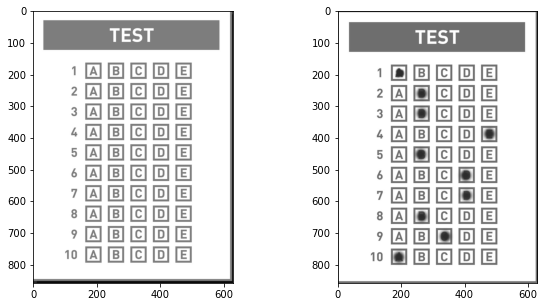

In [269]:
##1. Rasmlarni tayyorlash. Grayscale 

#javobli blankani yuklash
javob_varaq = cv2.imread('answer_blank.png')
javob_varaq = cv2.cvtColor(javob_varaq, cv2.COLOR_BGR2RGB)
javob_varaq_gr = cv2.cvtColor(javob_varaq, cv2.COLOR_RGB2GRAY)

#pustoy blankani yuklash
savol_varaq = cv2.imread('empty_blank.png')
savol_varaq = cv2.cvtColor(savol_varaq, cv2.COLOR_BGR2RGB)
savol_varaq_gr = cv2.cvtColor(savol_varaq, cv2.COLOR_RGB2GRAY)
savol_varaq_gr = np.resize(savol_varaq_gr,javob_varaq_gr.shape)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(savol_varaq_gr, cmap='gray')
plt.subplot(122)
plt.imshow(javob_varaq_gr,cmap='gray')

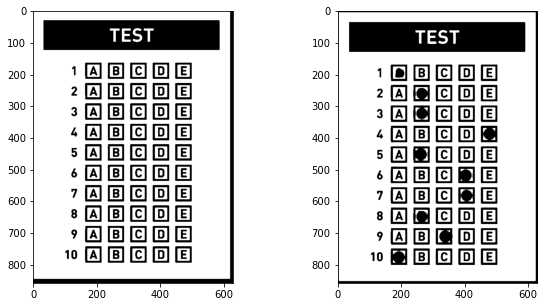

In [270]:
### 2.Osonroq ishlash uchun thresholding qilish 
blur_sv = cv2.GaussianBlur(savol_varaq_gr,(7,7),1)
blur_jv = cv2.GaussianBlur(javob_varaq_gr,(7,7),1)

_,binary_sv = cv2.threshold(blur_sv,200,255,cv2.THRESH_BINARY)
_,binary_jv = cv2.threshold(blur_jv,200,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(binary_sv, cmap='gray')
plt.subplot(122)
plt.imshow(binary_jv,cmap='gray')

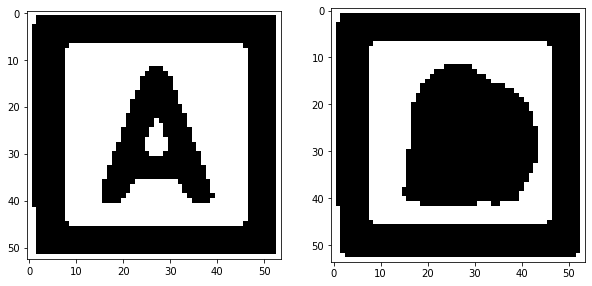

In [262]:
### 3.Belgilangan va belgilanmagan kataklarni solishtirish. 

def getKataklar(binary):
    """Binary rasm yuborib katakchalar konturlari aniqlanib, osha katakni qirqib listga rasm np array
    qilib yozib qaytaruvchi funksiya"""
    
    contours, hierarachy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    katakchalar = []

    for i in range(len(contours)-1,0,-1): #contourlarni variantlar ketma ketligi boyicha loop qilib oldim. kontorlarni
                                         #ongdan chapga qarab topgani uchun teskari loop qilib oldim.
            
        area = cv2.contourArea(contours[i]) #contour uzunligini (perimetrini) kichkina konturlardan qutilish uchun topib oldim.

        #faqatgina kvadrat test harf varianti bor  contourlarni belgilab olib, listga yozdim. 
        if area > 2000 and area < 3000: 
            x,y,w,h = cv2.boundingRect(contours[i])
            katak = binary[y:y+h,x:x+w]
            katakchalar.append(katak)
    return katakchalar
         
#bosh katak va belgilangan kataklarni solishtirish uchun alohida rasmlar sifatida listga yigib oldim.
sv_list = getKataklar(binary_sv)    
jv_list = getKataklar(binary_jv)    

#Kataklarni solishtirish .
k=0 
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sv_list[k], cmap='gray')
plt.subplot(122)
plt.imshow(jv_list[k],cmap='gray')


In [263]:
### 4.Bizning javoblar varaqasidagi yozuvlarni o'qib harf korinishiga otkazish. 

true_answers = np.array(['A','B','D','E','B','D','A','B','B','A']) #Orginal javoblar   
my_answers = [] #Qog'ozda belgilagan javobimizni kompyuter aniqlab shu listga yig'adi.  

#Rasmlarni compare qilish uchun uni nisbatlarini topib solishtiramiz. 
for k in range(50):
    """Binary rasm solishtirilgani sabali belgilangan katak va belgilanmagan bosh katak orasida farq juda katta boladi,
    2 ta belgilanmagan bosh kataklar farqi esa deyarli -5 +5 oralig'ida"""
    
    nisbat1 = (sv_list[k].sum())/(sv_list[k].shape[0] * sv_list[k].shape[1])
    nisbat2 = (jv_list[k].sum())/(jv_list[k].shape[0] * jv_list[k].shape[1])
    farq = int(nisbat1) - int(nisbat2) # - ishorani korsatish uchun int ga aylantirdik.
    
    #javoblar varaqasida katakda qaysi harf belgilanganligni topib listga yozadi.
    if farq > 20:
        
        if k%5==0:
            my_answers.append('A')
        
        elif k%5==1:
            my_answers.append('B')
                    
        elif k%5==2:
            my_answers.append('C')
                    
        elif k%5==3:
            my_answers.append('D')
                    
        elif k%5==4:
            my_answers.append('E')


In [268]:
### 5. Final. Nechta va necha foiz javob topilganligini tekshirish. 

tekshirish = np.char.equal(true_answers,my_answers)

topdi_soni = np.count_nonzero(tekshirish)
foiz = 10 * topdi_soni

print(f"10 ta savoldan {topdi_soni} tasi topildi.")
print(f"Umumiy savollarning  {foiz}% ga javob topildi.")


10 ta savoldan 7 tasi topildi.
Umumiy savollarning  70% ga javob topildi.
